In [1]:
import math
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from d2l import torch as d2l
import matplotlib.pyplot as plt

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5 # 数据越简单，模型越复杂，越容易过拟合。num_inputs为特征维度
true_w, true_b = torch.ones((num_inputs,1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train) # 生成人工数据集
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{"params":net[0].weight,"weight_decay":wd},{"params":net[0].bias}],lr=lr) # 惩罚项既可以写在目标函数里面，也可以写在训练算法里面，每一次在更新之前把当前的w乘以衰退因子weight_decay                     
    animator = d2l.Animator(xlabel='epoch',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])                   
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X),y)
            l.backward()
            trainer.step()
            if(epoch + 1) % 5 == 0:
                animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net,test_iter,loss)))
    print('w的L2范数是',net[0].weight.norm().item()) 

w的L2范数是 13.362107276916504


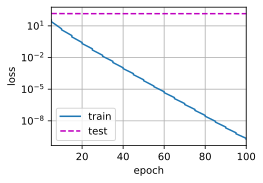

In [4]:
# 这些图看起来和我们从零开始实现权重衰减时的图相同
train_concise(0)

w的L2范数是 0.22946272790431976


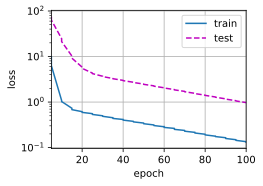

In [5]:
train_concise(10)
